In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_file='frozen_inference_graph.pb'


In [ ]:
model=cv2.dnn_DetectionModel(frozen_file,config_file)

In [ ]:
claslabels=[]
filename='/content/labels.txt'
with open(filename,'rt') as fpt:
  classlabels=fpt.read().rstrip('\n').split('\n')

In [ ]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
print(len(classlabels))

80


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f22f1fe7030>

In [ ]:
img=cv2.imread('/content/i1.png')

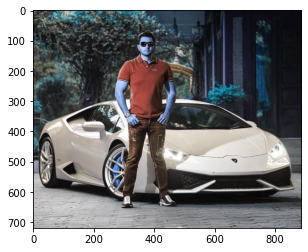

In [ ]:
plt.imshow(img)

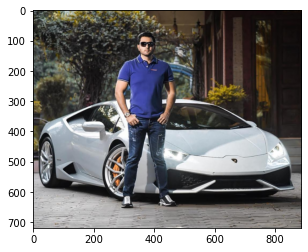

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
ci,conf,bbox=model.detect(img,confThreshold=0.5)

In [ ]:
print(ci)

[1 3]


In [ ]:
f_s=3
f=cv2.FONT_HERSHEY_PLAIN
for c,conf,box in zip(ci.flatten(),conf.flatten(),bbox):
  cv2.rectangle(img,box,(255,0,0),2)
  cv2.putText(img,classlabels[c-1],(box[0]+10,box[1]+40),f,fontScale=f_s,color=(0,255,0),thickness=3)

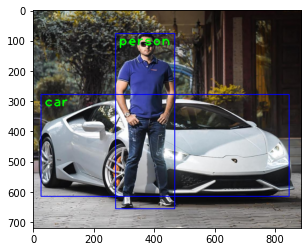

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))